<a href="https://colab.research.google.com/github/Juanolguin21/DataScienceEntrega/blob/main/Entrega_DataScience1_JuanManuelOlguin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bienvenido a este analisis de comercio, en el cual cada cliente que ingresa, se le hace un relevamiento de datos, y se lo guarda en la base de datos

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')
!pip install pandas openpyxl
file_path='/content/drive/MyDrive/data science 1 entrega/mercado.xlsx'


Mounted at /content/drive


In [ ]:
df= pd.read_excel(file_path)
print(df)

       Id_cliente   Num_Cuenta   apellido   nombre   mi  \
0               1  87462024688     Nowmer    Sheri   A.   
1               2  87470586299    Whelply  Derrick   I.   
2               3  87475757600      Derry   Jeanne  NaN   
3               4  87500482201     Spence  Michael   J.   
4               5  87514054179  Gutierrez     Maya  NaN   
...           ...          ...        ...      ...  ...   
10276       10277  87439274191       Ross     Fran  NaN   
10277       10278  87448420500    Calahoo   Myreda  NaN   
10278       10279  87453135848      Ayers     Mary   V.   
10279       10280  87458639740     Aiello   Ernest   J.   
10280       10281  87460163235    Cartney   Samuel   K.   

                  direccion1         ciudad estado_provincia  Codigo_postal  \
0           2433 Bailey Road       Tlaxiaco           Oaxaca          15057   
1         2219 Dewing Avenue          Sooke               BC          17172   
2            7640 First Ave.       Issaquah           

El DataSet podria ser aplicado a un comercio, en el cual los clientes son registrados cada vez que realizan una compra

Algunas hipotesis iniciales a trabajar en el comienzo de este proyecto, para realizar una estadistica de mis clientes pueden ser:

¿Cuantos Clientes por pais tenemos en nuestra Base de Datos?
¿Cuantos Clientes solteros o casados por pais tenemos en nuestra Base de Datos?


In [ ]:
df.index = df['Id_cliente']
df.isnull().sum()


,0
Id_cliente,0
Num_Cuenta,0
apellido,1
nombre,0
mi,4336
direccion1,0
ciudad,0
estado_provincia,0
Codigo_postal,0
pais,0


Chequeamos los valores nulos primordialmente para tener la idea de ello

Luego podemos proceder a imprimir la cantidad de clientes qe tenemos en nuestro DATASET por pais

In [ ]:
data_1=df[['pais','Id_cliente']].groupby(by='pais').count()
data_1

,Id_cliente
pais,
Canada,1717
Mexico,1205
USA,7359


Luego graficamos la segunda cuestion a tratar que es cuantos solteros y casados de estos clientes posee cada pais


In [ ]:
data_2=df[['Estado_civil','pais']].groupby(by='pais').value_counts()
data_2

pais    Estado_civil
Canada  M                885
        S                832
Mexico  S                610
        M                595
USA     S               3697
        M               3662
Name: count, dtype: int64

Realizamos la agrupacion en cada caso de la hipotesis cuestionada y procedemos a graficar las probabilidades tanto de una como de la otra

Text(0.5, 1.0, 'Clientes por pais')

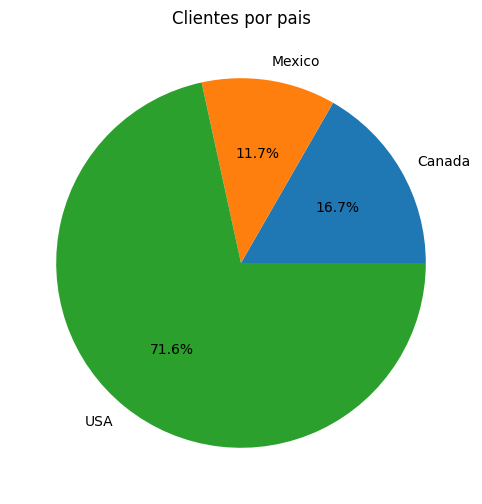

In [ ]:
data_1.index
fig,ax = plt.subplots(figsize =(10, 6))
ax.pie(data_1.Id_cliente, labels = data_1.index,autopct='%1.1f%%')
ax.set_title('Clientes por pais')

Aqui podemos visualizar la cantidad porcentual de clientes que tenemos en el dataset por pais

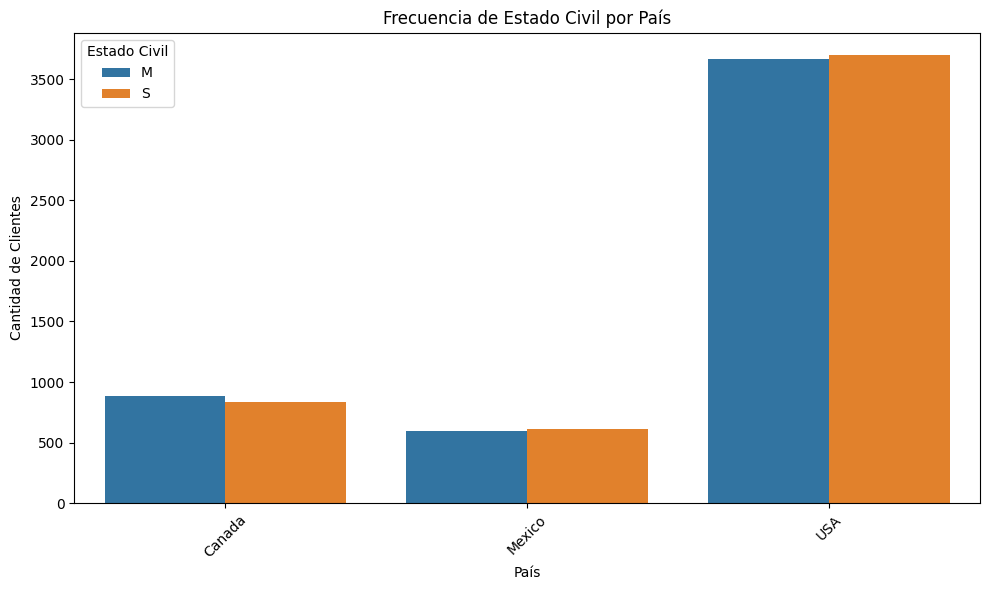

In [ ]:
df1 = pd.DataFrame(df)
conteo = df1.groupby(['Estado_civil', 'pais']).size().reset_index(name='Cantidad')
plt.figure(figsize=(10, 6))
sns.barplot(conteo, x='pais', y= conteo.Cantidad, hue='Estado_civil', errorbar=None)
plt.title('Frecuencia de Estado Civil por País')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('País')
plt.legend(title='Estado Civil')
plt.xticks(rotation=45)
plt.tight_layout()

Aqui podemos visualizar en cada pais cual es la cantidad de clientes que es soltero y cuales son los casados

Dicho esto podemos empezar a trabajar en una gestion de productos para los clientes de los paises que mas son registrados en el mercado y podemos tambien saber a que publico apuntar dependiendo del estado civil que poseen, posteriormente este analisis abarcara muchos mas factores determinantes para poder lograr un optimo funcionamiento de mi mercado!


MUCHAS GRACIAS POR SU TIEMPO!

Juan Manuel Olguin

ACA COMENZAREMOS LA ENTREGA N2 DEL PROYECTO


Trabajaremos con la hoja TC del Dataset que se relaciona con los tipos de TC que utilizan los clientes a realizar las compras para tener un analisis mas puntual de la clientela y de los pagos que nos realizan , limites y demas

REALIZAMOS LA CARGA DE LIBRERIAS NECESARIAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns


# Cargar el dataset desde un archivo Excel
data = pd.read_excel('/content/drive/MyDrive/data science 1 entrega/mercado.xlsx', sheet_name='TC')

INSTALAMOS COMPLEMENTOS

In [ ]:
pip install openpyxl

In [ ]:
pip install pandas openpyxl scikit-learn matplotlib


REVISAMOS VALORES NULOS E INSPECCIONAMOS EL DATASET

In [ ]:

print(data.head())
print(data.info())
print(data.isnull().sum())

   Id_cliente         CUIL               Zonal  Nro Sucursal     Sucursal  \
0           1  20049781424  BUENOS AIRES NORTE          2700    PERGAMINO   
1           2  20059736958             ROSARIO          3002       ROLDAN   
2           3  20060000639             ROSARIO          1097  ARROYO SECO   
3           4  20060489697             ROSARIO          3020      ROSARIO   
4           5  20076973092             GBA SUR          3385      SARANDI   

   haber_Reg11  ingreso_determinado  USO TC LIM MAX  ORIGEN PQ Precalificado  \
0     289185.0             289185.0               0  REG200              CNS   
1     289185.0             289185.0               0  REG200              CNS   
2     473238.5             473238.5               0  REG200              CNE   
3    2044005.0            2044005.0         2200000  REG200              CNZ   
4     473238.5             473238.5               0  REG200              CNE   

  NuevaCategoriaTC  Cantidad de  TC Acción PQ Modificaci

Manejo de valores nulos (Segun necesidades)

Separamos las características y la variable objetivo

NUESTRA VARIABLE OBJETIVO ES PARA PODER OBTENER LOS RESULTADOS EN CUANTO AL CLIENTE MAS CONCURRENTE O DE MAS COMPRAS REALIZADAS PARA PODER ESTABLECER UNA METRICA DE ANALISIS DE OFERTAS DESTINADAS A CIERTOS GRUPOS DE CLIENTES

In [ ]:

data = data.dropna()

X = data.drop('NuevaCategoriaTC', axis=1)
y = data['NuevaCategoriaTC']

Convertimos variables categóricas en numéricas

In [ ]:

X = pd.get_dummies(X, drop_first=True)


y = y.fillna(y.mode()[0])
y = y.astype('category').cat.codes

Seleccionamos las 10 mejores características

In [ ]:

selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
X_selected_features = selector.get_support(indices=True)
selected_columns = X.columns[X_selected_features].tolist()

print("Características seleccionadas:", selected_columns)

Características seleccionadas: ['haber_Reg11', 'ingreso_determinado', 'USO TC LIM MAX', 'Limite MC 071', 'Limite_VI', 'Zonal_PLAZA DE MAYO', 'Sucursal_PLAZA DE MAYO', 'PQ Precalificado_CNP', 'PQ Precalificado_CNS', 'PQ Precalificado_CNZ']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [  6 656 657 658] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


División de los datos en conjunto de entrenamiento y prueba

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

Entrenamiento del modelo

In [ ]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predicciones y evaluación del modelo

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
X = X.loc[:, X.apply(pd.Series.nunique) != 1]

CÁlCULO DE METRICAS

In [ ]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       419
           2       1.00      1.00      1.00       298
           3       1.00      1.00      1.00       290

    accuracy                           1.00      1371
   macro avg       1.00      1.00      1.00      1371
weighted avg       1.00      1.00      1.00      1371



Nombramos Nuevamente (de numerica a cetegorica para entender mas preciso)

In [ ]:

X = data.drop('NuevaCategoriaTC', axis=1)
y = data['NuevaCategoriaTC']

Visualización Con Datos CON CATEGORIAS Reales

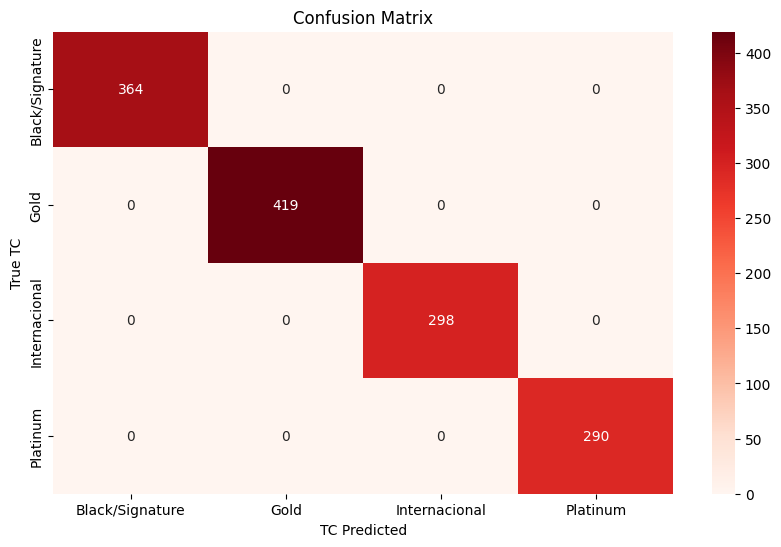

In [ ]:

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('TC Predicted')
plt.ylabel('True TC')
plt.title('Confusion Matrix')
plt.show()



La imagen muestra una matriz de confusión para un modelo de clasificación de cuatro tipos de tarjetas de crédito: Black/Signature, Gold, Internacional y Platinum. La matriz indica un rendimiento excelente del modelo en el conjunto de datos utilizado para la evaluación.

La matriz es diagonal, lo que significa que no hubo errores de clasificación.  Todos los valores fuera de la diagonal son cero, indicando que el modelo predijo correctamente la clase de cada tarjeta de crédito en el conjunto de prueba.

Black/Signature: 364 tarjetas fueron correctamente clasificadas como Black/Signature.

Gold: 419 tarjetas fueron correctamente clasificadas como Gold.

Internacional: 298 tarjetas fueron correctamente clasificadas como Internacionales.

Platinum: 290 tarjetas fueron correctamente clasificadas como Platinum.

Al Saber que los clientes con tarjetas GOLD son los que mas tengo cargados en mi BD ya puedo orientarme a ofertas al publico mas concurrente, y a la vez saber que limites manejan dicho tipo de tC, y mas informacion especifica.

REALIZAREMOS UNA DIVISION DE CONJUNTOS DE ENTRENAMIENTO PARA QUE NOS QUEDEN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = data.drop('NuevaCategoriaTC', axis=1)
y = data['NuevaCategoriaTC']

# 4. División en conjuntos de entrenamiento y prueba
# test_size: proporción de datos para el conjunto de prueba (0.2 = 20%)
# random_state: para reproducibilidad (asegura que la división sea siempre la misma)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Verificación de las dimensiones
print("Dimensiones del conjunto de entrenamiento (X_train):", X_train.shape)
print("Dimensiones del conjunto de prueba (X_test):", X_test.shape)
print("Dimensiones del conjunto de entrenamiento (y_train):", y_train.shape)
print("Dimensiones del conjunto de prueba (y_test):", y_test.shape)

# Ahora puedemos usar X_train e y_train para entrenar el modelo, y X_test e y_test para probarlo.


Dimensiones del conjunto de entrenamiento (X_train): (5484, 16)
Dimensiones del conjunto de prueba (X_test): (1371, 16)
Dimensiones del conjunto de entrenamiento (y_train): (5484,)
Dimensiones del conjunto de prueba (y_test): (1371,)


la evaluación del modelo se debe realizar siempre en el conjunto de prueba (X_test, y_test), nunca en el conjunto de entrenamiento (X_train, y_train).  La evaluación en el conjunto de entrenamiento solo sirve para monitorear el proceso de entrenamiento, pero no es una medida de generalización confiable.

Ahora visualizareos, los distintos limites de TC y como se comporta el algoritmo en base a las mas destacados, Esta vez usaremos PIPELINE segun los limites que estas poseen!

MARCAR LOS OBJETIVOS (COLUMNA)

In [ ]:

data = data.dropna()

X = data.drop('Limite_VI', axis=1)
y = data['Limite_VI']

Aplicar SimpleImputer ANTES de get_dummies

In [ ]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Imputa con la moda
    ('onehot', pd.get_dummies),
    ('selector', SelectKBest(f_classif, k=10)), # Ajusta k según sea necesario
    ('scaler', StandardScaler())
])

Aplicar LabelEncoder a columnas categóricas ANTES de SimpleImputer

In [ ]:
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

ENTRENAMOS EL MODELO

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

SCOREAMOS LOS DATOS

In [ ]:
scores = cross_val_score(model, X, y, cv=5)
print("Scores de validación cruzada:", scores)
print("Precisión media de validación cruzada:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Scores de validación cruzada: [0.97082422 0.98322392 0.99197666 0.99270605 0.94967177]
Precisión media de validación cruzada: 0.9776805251641137


GENEREAMOS LAS CLASIFICACIONES DEL METODO

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      112000       1.00      1.00      1.00         4
      128000       1.00      1.00      1.00        71
      200000       1.00      1.00      1.00         1
      224000       1.00      1.00      1.00       128
      256000       1.00      0.99      0.99        87
      280000       1.00      1.00      1.00         2
      300000       0.80      1.00      0.89         4
      320000       1.00      0.67      0.80         3
      350000       0.67      0.67      0.67         9
      384000       0.33      0.25      0.29         4
      400000       1.00      1.00      1.00       172
      420000       1.00      0.97      0.98        67
      448000       0.84      0.94      0.89        17
      480000       0.80      1.00      0.89         4
      512000       1.00      0.92      0.96        12
      550000       1.00      1.00      1.00         7
      580000       1.00      1.00      1.00         9
      600000       1.00    

PROCEDEMOS A LA VISUALIZACION DE LA MATRIZ Y DE LAS COINCIDENCIAS

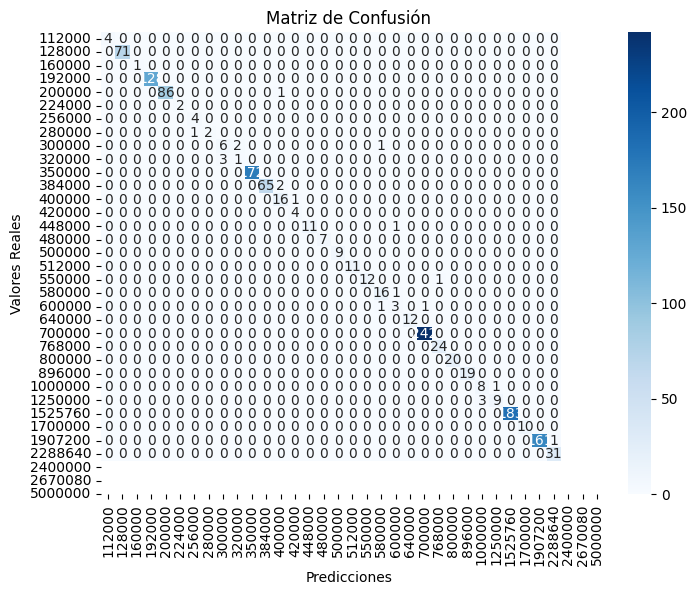

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

COMO CONCLUCION DE LAS HIPOTESIS A TRABAJAR PODEMOS DETERMINAR QUE LA TC CON MAYORES VOLUMENES DE COMPRA CSON LAS GOLD Y PODEOS ORIENTAR LAS OFERTAS A ESTE CONJUNTO DE CLINETES, DISTINTIVAS, O OFRECERLES ALGUN BENEFICIO, A SU VEZ PODEMOS VISUALIZAR QUE LOS LIMITES IMPLICADOS EN LA MATRIZ DE CONFUSION SON LA MAYORIA DE LAS TARJETAS GOLD QUE ANTERIORMENTE VIMOS MAS RECURRENTES!

